In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

In [98]:
# Load data
data = loadmat("ex5data1.mat")
X, y = data["X"], data["y"] # Training set
Xval, yval = data["Xval"], data["yval"] # Validation set
Xtest, ytest = data["Xtest"], data["ytest"] # Test set 

Text(0, 0.5, 'Water flowing out of the dam(y)')

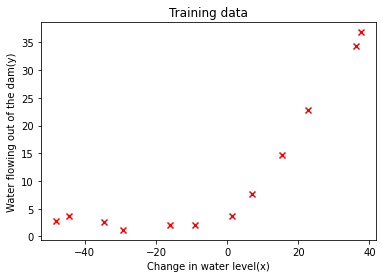

In [99]:
# Plot the training data
plt.scatter(X, y, marker="x", c="red")
plt.title("Training data")
plt.xlabel("Change in water level(x)")
plt.ylabel("Water flowing out of the dam(y)")

In [100]:
def linearRegCostFunction(theta, X, y, lamda):
    """Compute the cost and gradient for regularized 
    linear regression with multiple variables
    
    Parameters:
    X: training data of shape (n, d)
    y: label of training data of shape (n, 1)
    theta: Weights for linear regression model of shape (d+1,)
    lamda: Regularization parameter
    
    Returns:
    J: Regularized cost function
    grad: Gradient respect to theta of the same shape with theta
    """
    theta = theta[:, np.newaxis]
    n_samples = len(y)
    d = X.shape[1]
    X_train = np.c_[np.ones((n_samples, 1)), X]
    lsq = np.sum(np.square(X_train @ theta - y)) / (2 * n_samples)
    reg = lamda * np.sum(np.square(theta[1:])) / (2 * n_samples)
    J = lsq + reg
    
    grad = np.sum((X_train @ theta - y) * X_train, axis=0, keepdims=True) / n_samples
    tmp = lamda * theta / n_samples
    tmp[0] = 0
    grad = grad.T + tmp
    return J, grad.squeeze()

In [102]:
# Test
theta = np.ones(2)
J, grad = linearRegCostFunction(theta, X, y, 1)
print(f'Cost at theta=[[1], [1]]:{J:.6f}\n(this value should be abut 303.993192)')
print(f"Gradient at theta=[[1], [1]]:[{grad[0]:.6f}, {grad[1]:.6f}]\n(this value should be about [-15.303016, 598.250744])")

Cost at theta=[[1], [1]]:303.993192
(this value should be abut 303.993192)
Gradient at theta=[[1], [1]]:[-15.303016, 598.250744]
(this value should be about [-15.303016, 598.250744])


In [103]:
def trainLinearReg(X, y, lamda):
    """Train linear regression given data set [X, y]
    and a regularization parameter lambda
    """
    theta0 = np.zeros(X.shape[1] + 1)
    result = minimize(linearRegCostFunction, x0=theta0, args=(X, y, lamda), jac=True, method='BFGS')
    if result.success:
        theta = result.x
    return theta

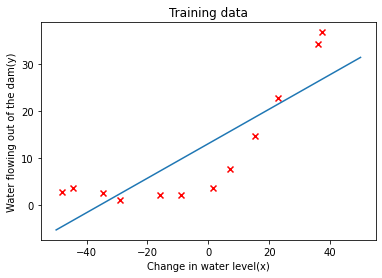

In [104]:
# Fitting linear regression and plot fit line
theta = trainLinearReg(X, y, 0)
plt.scatter(X, y, marker="x", c="red")
plt.title("Training data")
plt.xlabel("Change in water level(x)")
plt.ylabel("Water flowing out of the dam(y)")
x2plot = np.linspace(-50, 50, 100)
y2plot = theta[1] * x2plot + theta[0]
plt.plot(x2plot, y2plot)

In [139]:
# Learning curve
def learningCure(X, y, Xval, yval, lamda=0):
    n_samples = X.shape[0]
    error_train = np.zeros(n_samples)
    error_val = np.zeros(n_samples)
    for i in range(n_samples):
        X_train = X[:i+1]
        y_train = y[:i+1]
        theta = trainLinearReg(X_train, y_train, lamda)
        J, _ = linearRegCostFunction(theta, X_train, y_train, 0)
        Jval, _ = linearRegCostFunction(theta, Xval, yval, 0)
        error_train[i] = J
        error_val[i] = Jval
    return error_train, error_val

In [140]:
error_train, error_val = learningCure(X, y, Xval, yval)

Text(0, 0.5, 'Error')

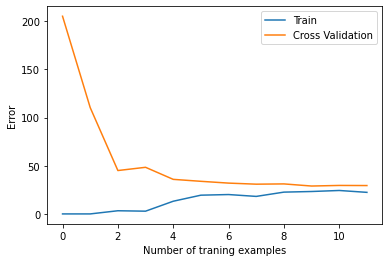

In [141]:
plt.plot(error_train, label="Train")
plt.plot(error_val, label="Cross Validation")
plt.legend()
plt.xlabel("Number of traning examples")
plt.ylabel("Error")

In [142]:
# Feature map
def polyFeatures(X, p):
    """Given a Vector X, return a matrix X_poly where p-th column
    of X contains the values of X to the p-th power
    """
    n_samples = X.shape[0]
    X_poly = np.zeros((n_samples, p))
    for i in range(p):
        X_poly[:, i:i+1] = np.power(X, i+1)
    return X_poly

In [143]:
# Feature normalize
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [144]:
p = 8
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mu) / sigma

In [145]:
# Learning curve for polynomial regression
lamda = 0
theta = trainLinearReg(X_poly, y, lamda)

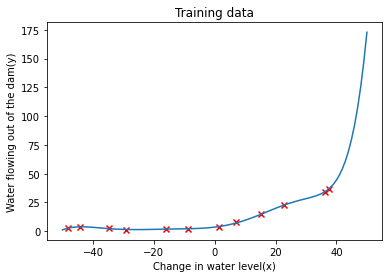

In [146]:
plt.scatter(X, y, marker="x", c="red")
plt.title("Training data")
plt.xlabel("Change in water level(x)")
plt.ylabel("Water flowing out of the dam(y)")
x2plot = np.linspace(-50, 50, 100).reshape(-1, 1)
x2plot_poly = polyFeatures(x2plot, p)
x2plot_poly = (x2plot_poly - mu) / sigma
x2plot_poly = np.c_[np.ones((100, 1)), x2plot_poly]
y2plot = x2plot_poly @ theta
plt.plot(x2plot, y2plot)

In [147]:
error_train, error_val = learningCure(X_poly, y, X_poly_val, yval, lamda)

Text(0, 0.5, 'Error')

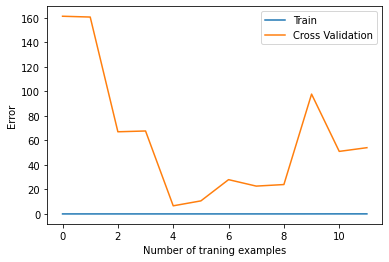

In [148]:
plt.plot(error_train, label="Train")
plt.plot(error_val, label="Cross Validation")
plt.legend()
plt.xlabel("Number of traning examples")
plt.ylabel("Error")

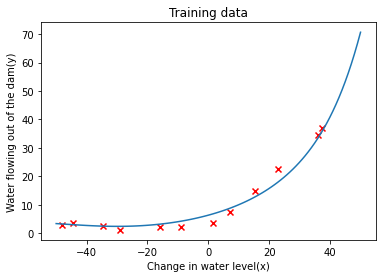

In [149]:
# lambda = 1
lamda = 1
theta = trainLinearReg(X_poly, y, lamda)
plt.scatter(X, y, marker="x", c="red")
plt.title("Training data")
plt.xlabel("Change in water level(x)")
plt.ylabel("Water flowing out of the dam(y)")
x2plot = np.linspace(-50, 50, 100).reshape(-1, 1)
x2plot_poly = polyFeatures(x2plot, p)
x2plot_poly = (x2plot_poly - mu) / sigma
x2plot_poly = np.c_[np.ones((100, 1)), x2plot_poly]
y2plot = x2plot_poly @ theta
plt.plot(x2plot, y2plot)

Text(0, 0.5, 'Error')

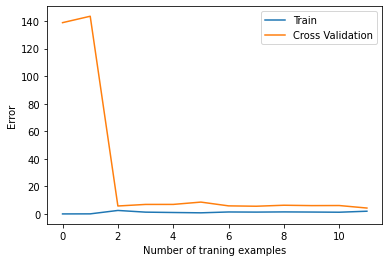

In [150]:
error_train, error_val = learningCure(X_poly, y, X_poly_val, yval, lamda)
plt.plot(error_train, label="Train")
plt.plot(error_val, label="Cross Validation")
plt.legend()
plt.xlabel("Number of traning examples")
plt.ylabel("Error")

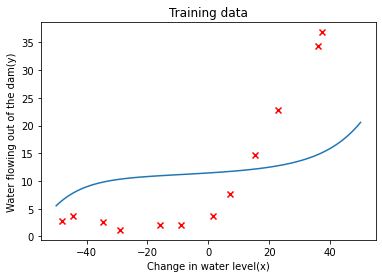

In [151]:
# lambda = 100
lamda = 100
theta = trainLinearReg(X_poly, y, lamda)
plt.scatter(X, y, marker="x", c="red")
plt.title("Training data")
plt.xlabel("Change in water level(x)")
plt.ylabel("Water flowing out of the dam(y)")
x2plot = np.linspace(-50, 50, 100).reshape(-1, 1)
x2plot_poly = polyFeatures(x2plot, p)
x2plot_poly = (x2plot_poly - mu) / sigma
x2plot_poly = np.c_[np.ones((100, 1)), x2plot_poly]
y2plot = x2plot_poly @ theta
plt.plot(x2plot, y2plot)

Text(0, 0.5, 'Error')

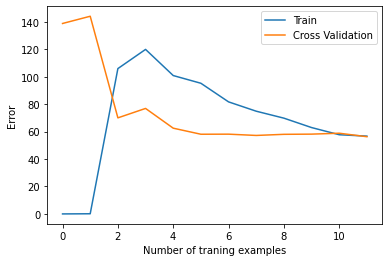

In [152]:
error_train, error_val = learningCure(X_poly, y, X_poly_val, yval, lamda)
plt.plot(error_train, label="Train")
plt.plot(error_val, label="Cross Validation")
plt.legend()
plt.xlabel("Number of traning examples")
plt.ylabel("Error")

In [157]:
# Validation to select lambda
def validationCurve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100])
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    for i, l in enumerate(lambda_vec):
        theta = trainLinearReg(X, y, l)
        J, _ = linearRegCostFunction(theta, X, y, 0)
        Jval, _ =linearRegCostFunction(theta, Xval, yval, 0)
        error_train[i] = J
        error_val[i] = Jval
    return error_train, error_val

Text(0, 0.5, 'Error')

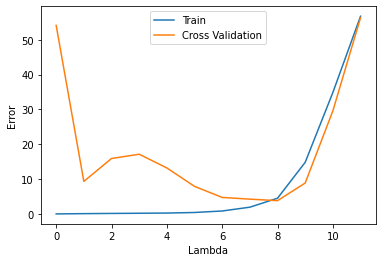

In [158]:
error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)
plt.plot(error_train, label="Train")
plt.plot(error_val, label="Cross Validation")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Error")

In [168]:
# Test error
theta = trainLinearReg(X_poly, y, lamda=3)
J, _ = linearRegCostFunction(theta, X_poly_test, ytest, 0)
print(fr"The error on test data:{J} for lambda=3")

The error on test data:3.5720266461333754 for lambda=3
